<a href="https://colab.research.google.com/github/C9342-mhmt/Assignment/blob/main/soldier_race_project_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_f= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

In [ ]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,...,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,...,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,...,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,...,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,...,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,...,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,...,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,...,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,...,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,...,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [ ]:
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [ ]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


There are lots of columns. Lets look at the shape and info of them in one row.

In [ ]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [ ]:
df_f.info(verbose=True),df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

(None, None)

Now we can easily see that, both of them have same number of columns

In [ ]:
df = pd.concat([df_m,df_f])

In [ ]:
df.shape

(6068, 109)

Görüldüğü gibi kolon sayımız arttı yani bütün kolonlarımız aynı değil. iki veri setini inceledim. Yalnızca bir sütun adı farklıdır. Düzeltelim ve yeniden birleştirelim ve EDA sürecimize başlayalım.

In [ ]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [ ]:
df = pd.concat([df_m,df_f])
df.shape

(6068, 108)

In [ ]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [ ]:
df.isnull().sum().any()

True

In [ ]:
df.isnull().any().any()

True

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [ ]:
NaN_list =[]
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)

Ethnicity = 4647


In [ ]:
NaN_list

['Ethnicity']

In [ ]:
df = df.drop(NaN_list, axis=1)

In [ ]:
df.isnull().sum().any()

False

The second thing that caught my eye in the Dataset is; "SubjectNumericRace" and "DODRace" columns

**SubjectNumericRace**: a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

**DODRace**: Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [ ]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


I've decided to drop subjectnumericrace column.


In [ ]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)



There was an instruction above:

Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [ ]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [ ]:
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [ ]:
df.shape

(5769, 106)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64


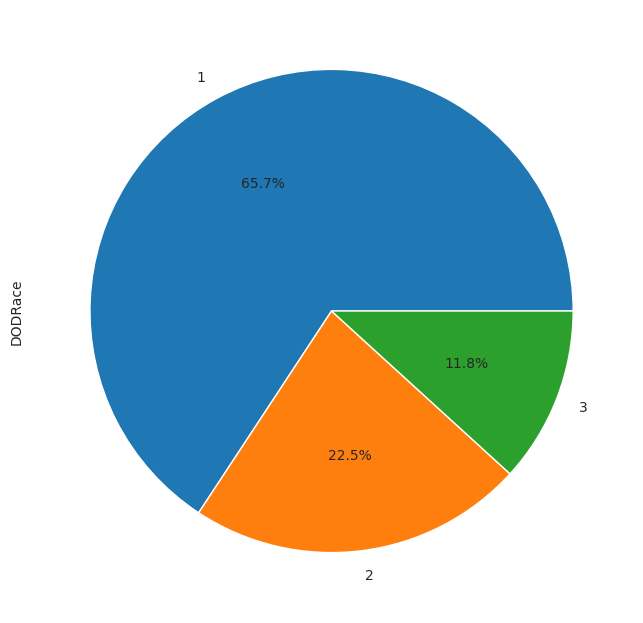

In [ ]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

Weightlbs and Heightin columns:

I've found 2 columns with the same information about weight in my dataset.I drop it.

In [ ]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
1981,180,832
1982,150,717
1983,168,762
1984,133,632


In [ ]:
df.drop(["weightkg"], axis = 1, inplace=True)

In [ ]:
for columns in df.select_dtypes(include=[np.number]).columns:
    if df[columns].min() == 0:
        print(columns)

Weightlbs


In [ ]:
df["Weightlbs"].argmin()

824

In [ ]:
df.iloc[824][["Weightlbs","Heightin"]]

Weightlbs     0
Heightin     71
Name: 866, dtype: object

In [ ]:
df.drop(index = df["Weightlbs"].argmin(), inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.select_dtypes(exclude=[np.number]).head().T


,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Date,4-Oct-10,4-Oct-10,4-Oct-10,12-Oct-10,12-Oct-10
Installation,Fort Hood,Fort Hood,Fort Hood,Fort Hood,Fort Hood
Component,Regular Army,Regular Army,Regular Army,Regular Army,Regular Army
Branch,Combat Arms,Combat Support,Combat Support,Combat Service Support,Combat Service Support
PrimaryMOS,19D,68W,68W,88M,92G
SubjectsBirthLocation,North Dakota,New York,New York,Wisconsin,North Carolina
WritingPreference,Right hand,Left hand,Left hand,Right hand,Right hand


In [ ]:
# to find how many unique values object features have
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value
WritingPreference has 3 unique value


Let's create our non-numeric list, which will cause our data to swell when we apply the get dummies operation and will not yield any meaningful results, and perform our drop operation.

First of all, it is useful to look at how our "Component" and "Branch" features explain our data with the following groupings:

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace
Army National Guard  1          1854
                     2           499
                     3           253
Army Reserve         1           114
                     2            52
                     3            41
Regular Army         1          1822
                     2           747
                     3           385
Name: DODRace, dtype: int64

In [ ]:
df.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          623
                                             2           79
                                             3           74
                     Combat Service Support  1          917
                                             2          312
                                             3          142
                     Combat Support          1          314
                                             2          108
                                             3           37
Army Reserve         Combat Arms             1            5
                                             3            1
                     Combat Service Support  1           82
                                             3           30
                                             2           24
                     Combat Support          2           28
                                             1 

In [ ]:
drop_list_nonnumeric = ["Date", "Installation", "Component","PrimaryMOS"]
df.drop(["Date", "Installation", "Component","PrimaryMOS"], axis=1, inplace=True)

In [ ]:
df.shape

(5767, 101)

In [ ]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [ ]:
df.drop("subjectid", axis = 1, inplace = True)

**Correlation**

Now let's look at the correlational relations and then find our features that can be multicollinearity and do the necessary operations.

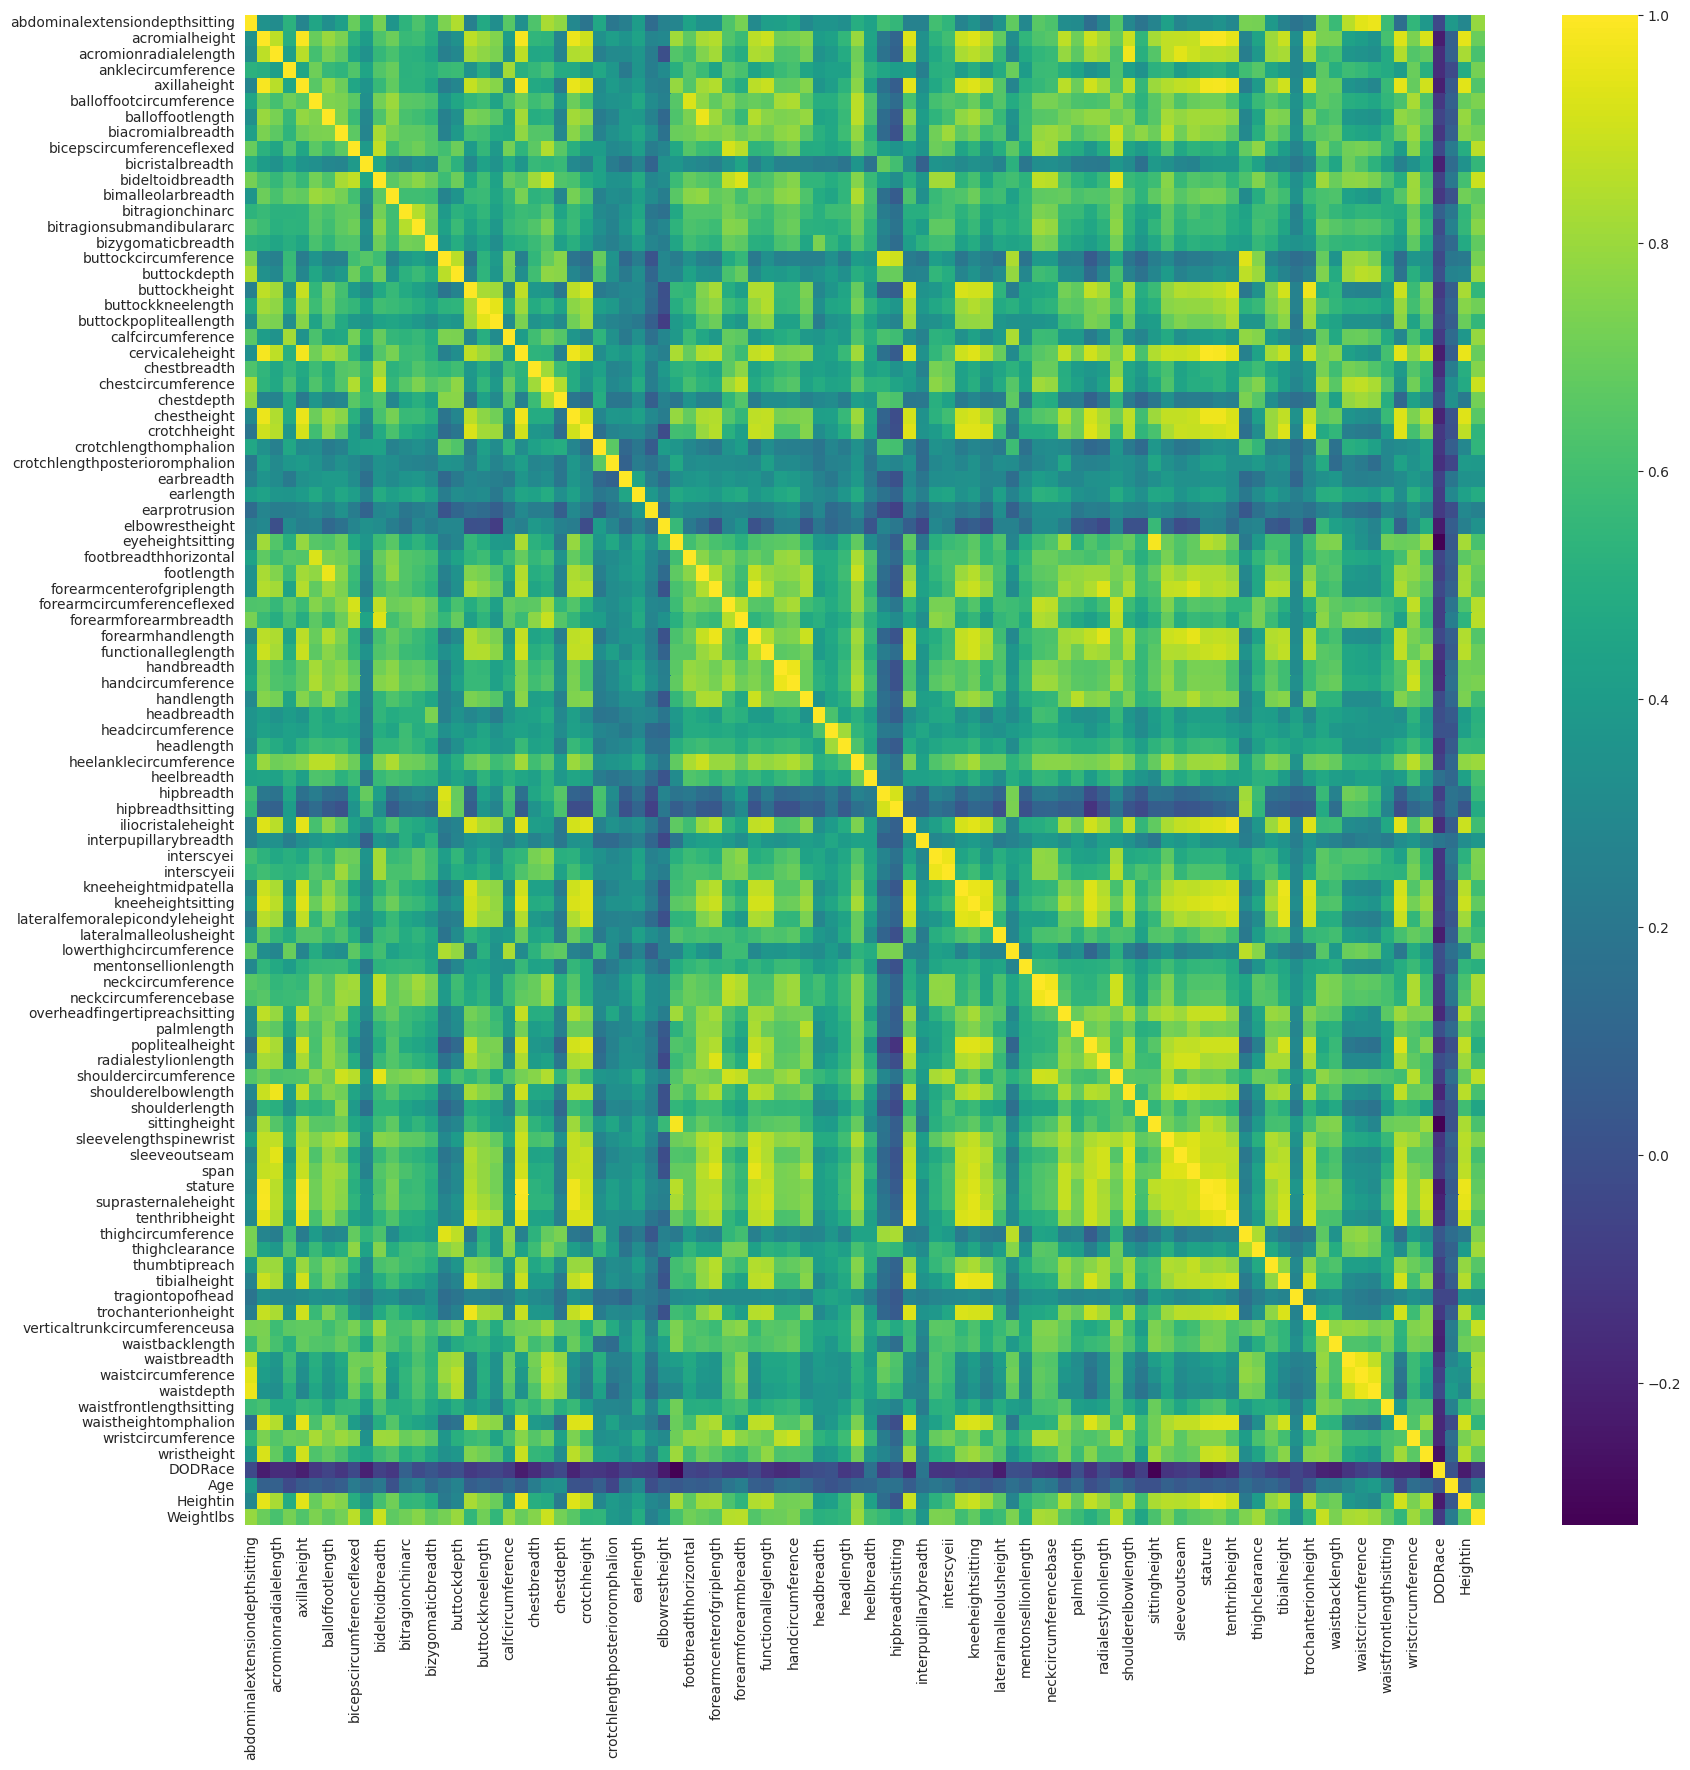

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

In [ ]:
df_copy=df

In [ ]:
df_temp = df.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count)

Number of strong corelated features: done


In [ ]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
287,Heightin,cervicaleheight
288,Heightin,chestheight
289,Heightin,stature
290,Heightin,suprasternaleheight


In [ ]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
axillaheight                      15
cervicaleheight                   15
tenthribheight                    15
iliocristaleheight                15
waistheightomphalion              15
crotchheight                      14
suprasternaleheight               13
kneeheightmidpatella              12
chestheight                       12
tibialheight                      11
acromialheight                    11
stature                           10
poplitealheight                   10
trochanterionheight                9
span                               9
lateralfemoralepicondyleheight     7
Heightin                           7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
forearmcenterofgriplength          3
functionalleglength                3
waistcircumference                 3
shoulderelbowlength                3
acromionradialelength         

Last Adjustment of EDA's¶


The last thing to do: We must change the target column of our model , as categorically. Because in ML models, of the target column consists of numbers, the models may make mistakes in the weightings.

In [ ]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

White       3790
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

## Explore Data

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X= df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X,drop_first=True)
y= df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6, stratify =y)

In [ ]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

test scores 
--------------
[[288  19  17]
 [  8 133  29]
 [ 17 119 812]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.90       324
    Hispanic       0.49      0.78      0.60       170
       White       0.95      0.86      0.90       948

    accuracy                           0.86      1442
   macro avg       0.79      0.84      0.80      1442
weighted avg       0.89      0.86      0.87      1442



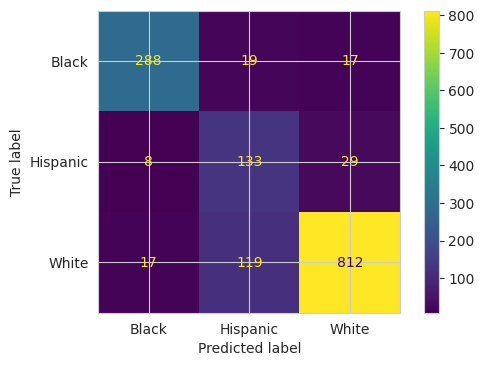

In [ ]:
log_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model,X_test,y_test,values_format='.0f')

train scores 
--------------
[[ 916   32   26]
 [  19  428   62]
 [  65  322 2455]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       974
    Hispanic       0.55      0.84      0.66       509
       White       0.97      0.86      0.91      2842

    accuracy                           0.88      4325
   macro avg       0.81      0.88      0.83      4325
weighted avg       0.91      0.88      0.89      4325



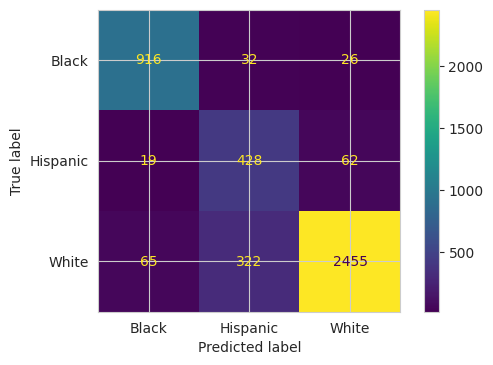

In [ ]:
y_pred = log_model.predict(X_train)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(log_model,X_train,y_train);

Let's make some differences one some parameters.

Below is our function that performs cross validation according to the "f1 score".

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
f1score = make_scorer(f1_score, average="weighted")
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = f1score, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8518, 0.8844, 0.8521, 0.8651, 0.8708] 

 f1score : %86.48, std : %1.225 



### Vanilla Logistic Model

### Logistic Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"] )

In [ ]:
param_grid = { "class_weight" : ["balanced", None],
               'penalty': ["l1","l2"],
               'solver' : ['saga','lbfgs'],
             }

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [ ]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
log_model_grid.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

[[290   5  29]
 [  7  91  72]
 [  7  17 924]]
              precision    recall  f1-score   support

       Black       0.95      0.90      0.92       324
    Hispanic       0.81      0.54      0.64       170
       White       0.90      0.97      0.94       948

    accuracy                           0.90      1442
   macro avg       0.89      0.80      0.83      1442
weighted avg       0.90      0.90      0.90      1442



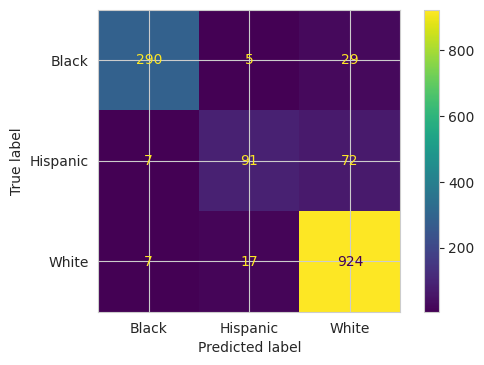

In [ ]:
y_pred = log_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model_grid,X_test,y_test);

In [ ]:
from sklearn.metrics import roc_curve, auc

Our def function to be used in drawing the roc curve for the multiclass target label is as follows:



In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

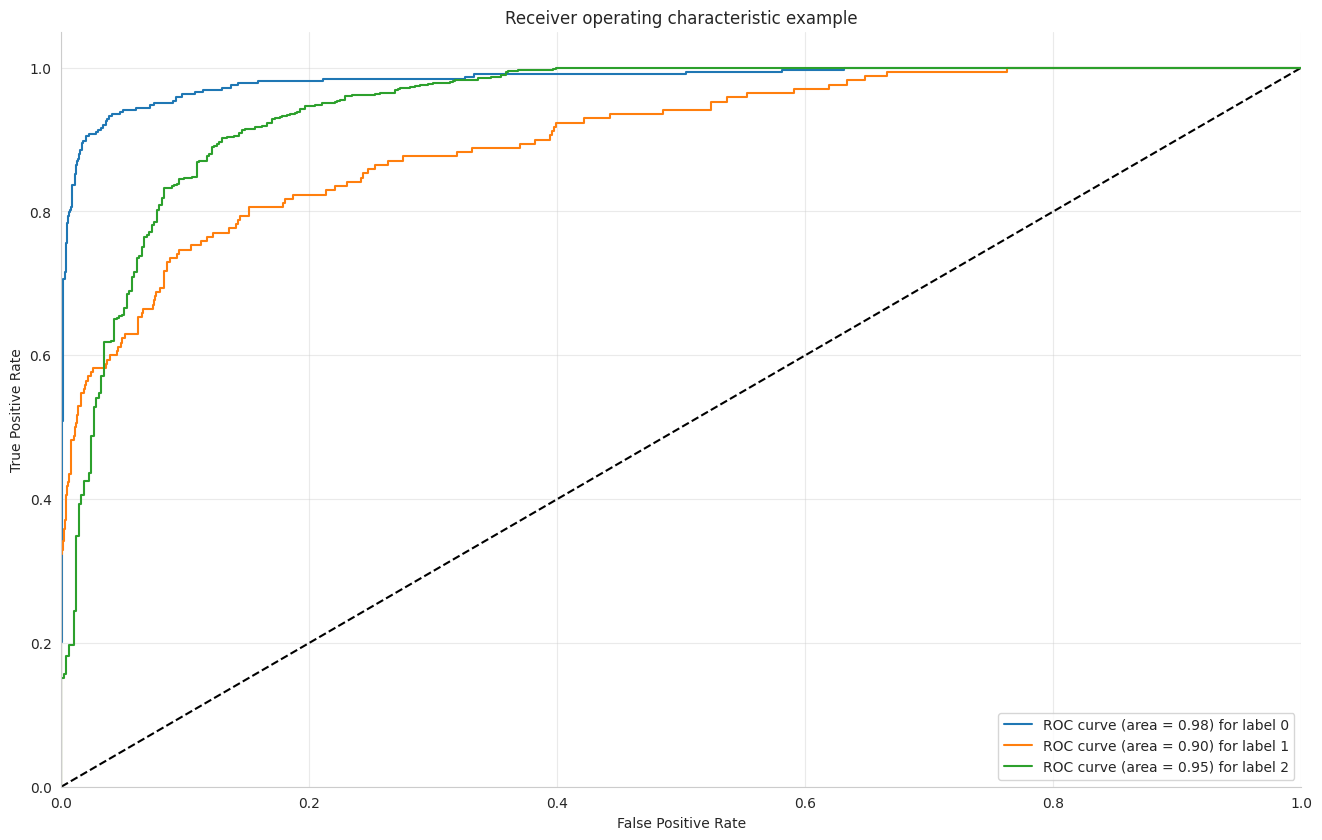

In [ ]:
plot_multiclass_roc(log_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

## 2. SVC

In [ ]:
from sklearn.svm import SVC

### Vanilla SVC model 

test scores 
--------------
[[292  15  17]
 [  8 134  28]
 [ 10 138 800]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       324
    Hispanic       0.47      0.79      0.59       170
       White       0.95      0.84      0.89       948

    accuracy                           0.85      1442
   macro avg       0.79      0.84      0.80      1442
weighted avg       0.89      0.85      0.86      1442



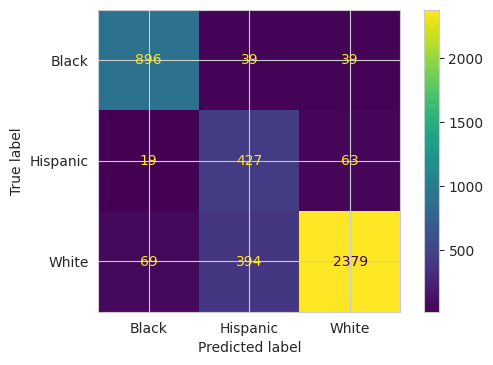

In [ ]:
svm_model = SVC(class_weight="balanced")

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

train scores 
--------------
[[ 896   39   39]
 [  19  427   63]
 [  69  394 2379]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       974
    Hispanic       0.50      0.84      0.62       509
       White       0.96      0.84      0.89      2842

    accuracy                           0.86      4325
   macro avg       0.79      0.87      0.81      4325
weighted avg       0.89      0.86      0.87      4325



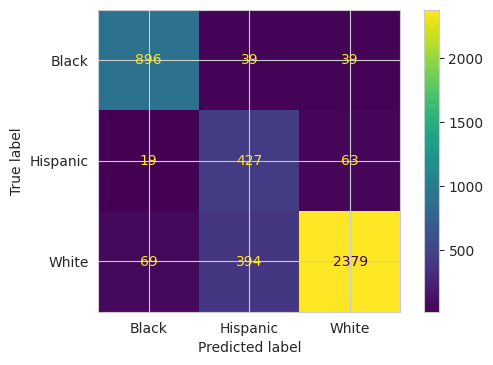

In [ ]:
y_pred = svm_model.predict(X_train)

print("train scores","\n--------------")

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

In [ ]:
param_grid = {'C': np.linspace(200,400,5),
              'decision_function_shape' : ['ovr','ovo'],
              'gamma': ["scale", "auto", 1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]
             }

In [ ]:
model = SVC(class_weight="balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

###  SVC Model GridsearchCV

In [ ]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([200., 250., 300., 350., 400.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'C': 250.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

[[286   7  31]
 [ 10  93  67]
 [  5  14 929]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       324
    Hispanic       0.82      0.55      0.65       170
       White       0.90      0.98      0.94       948

    accuracy                           0.91      1442
   macro avg       0.89      0.80      0.84      1442
weighted avg       0.90      0.91      0.90      1442



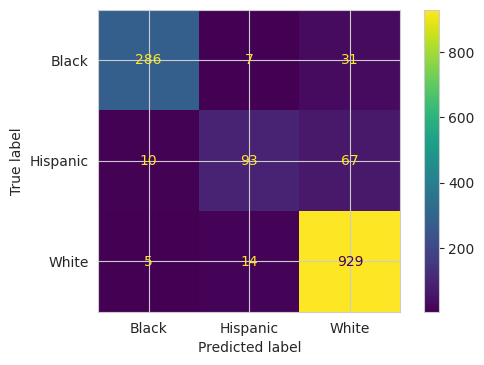

In [ ]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

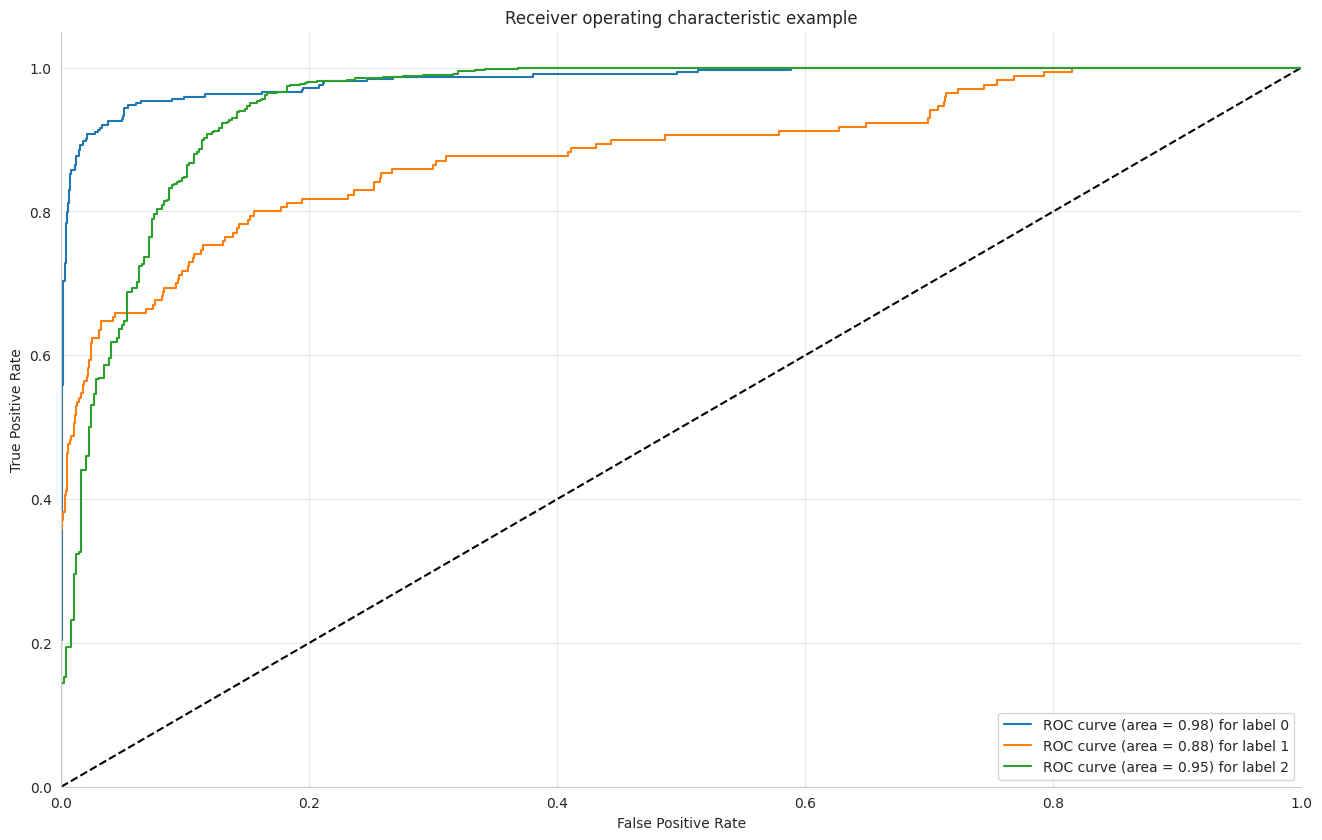

In [ ]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_mod = RandomForestClassifier()

In [ ]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

[[229   2  93]
 [ 11  21 138]
 [ 18   4 926]]
              precision    recall  f1-score   support

       Black       0.89      0.71      0.79       324
    Hispanic       0.78      0.12      0.21       170
       White       0.80      0.98      0.88       948

    accuracy                           0.82      1442
   macro avg       0.82      0.60      0.63      1442
weighted avg       0.82      0.82      0.78      1442



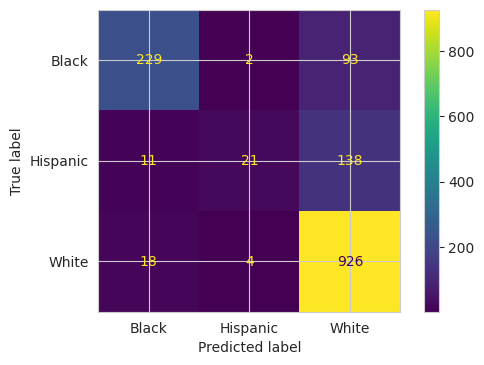

In [ ]:
y_pred = rf_mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_mod,X_test,y_test);

[[ 974    0    0]
 [   0  509    0]
 [   0    0 2842]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       974
    Hispanic       1.00      1.00      1.00       509
       White       1.00      1.00      1.00      2842

    accuracy                           1.00      4325
   macro avg       1.00      1.00      1.00      4325
weighted avg       1.00      1.00      1.00      4325



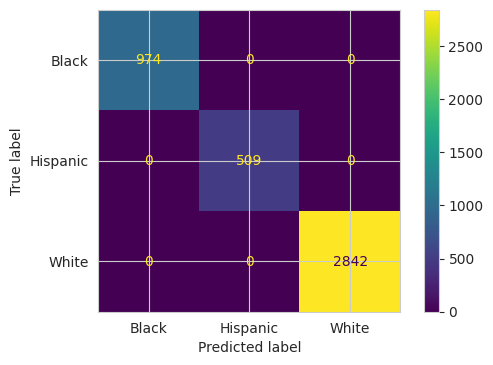

In [ ]:
y_pred = rf_mod.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(rf_mod,X_train,y_train);

In [ ]:
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[10,12,14,16],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced',None]}

In [ ]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

### RF Model GridsearchCV

In [ ]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 22,
 'n_estimators': 400}

[[263  10  51]
 [ 19  72  79]
 [ 45  72 831]]
              precision    recall  f1-score   support

       Black       0.80      0.81      0.81       324
    Hispanic       0.47      0.42      0.44       170
       White       0.86      0.88      0.87       948

    accuracy                           0.81      1442
   macro avg       0.71      0.70      0.71      1442
weighted avg       0.80      0.81      0.81      1442



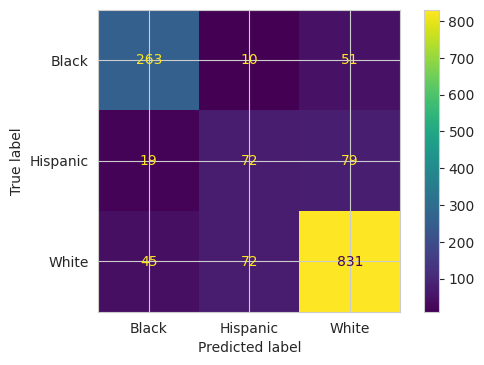

In [ ]:
y_pred = rf_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_grid_model,X_test,y_test);

In [ ]:
def plot_multiclass_roc_for_tree(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

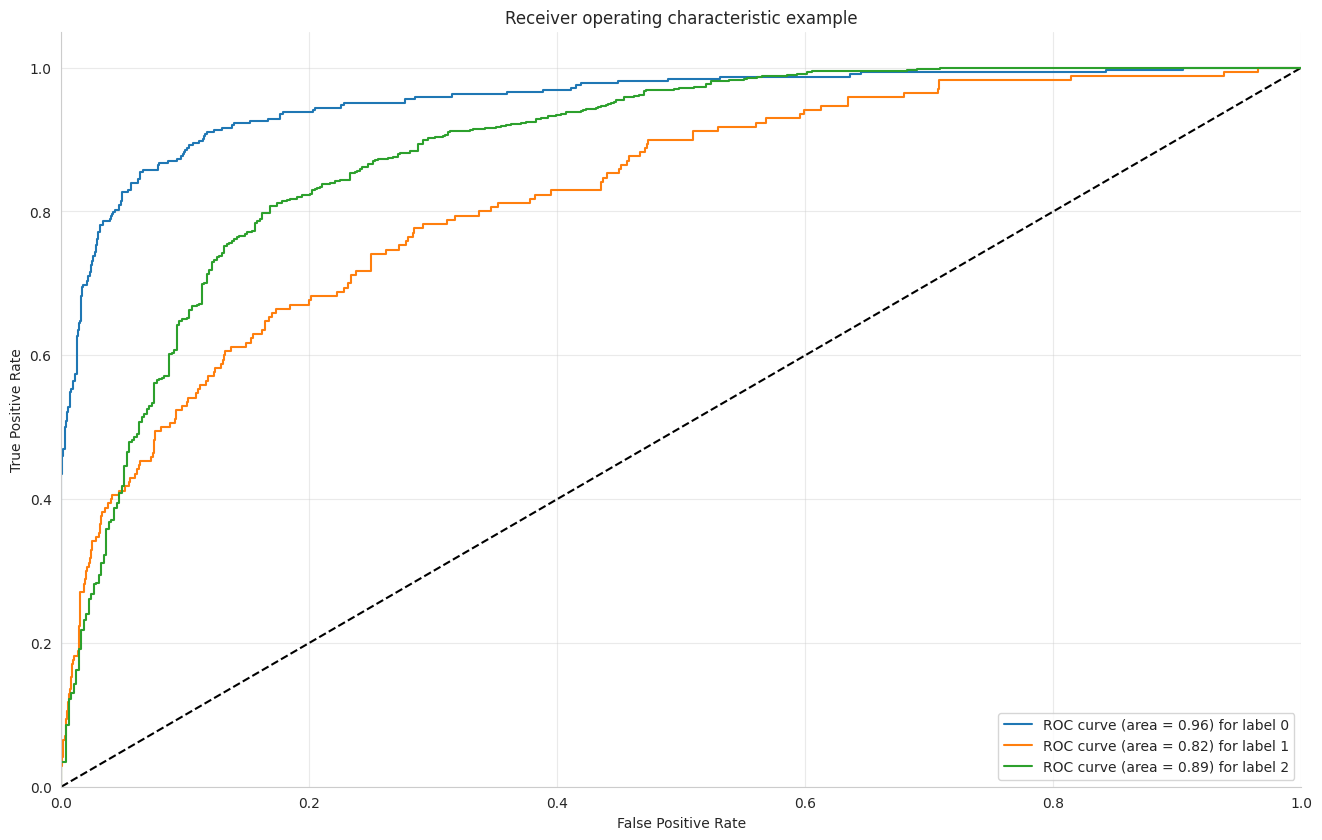

In [ ]:
plot_multiclass_roc_for_tree(rf_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10));

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

[[262   2  60]
 [  8  64  98]
 [ 13   8 927]]
              precision    recall  f1-score   support

       Black       0.93      0.81      0.86       324
    Hispanic       0.86      0.38      0.52       170
       White       0.85      0.98      0.91       948

    accuracy                           0.87      1442
   macro avg       0.88      0.72      0.77      1442
weighted avg       0.87      0.87      0.86      1442



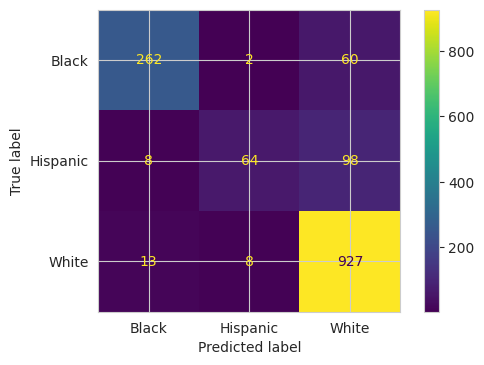

In [ ]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_model,X_test,y_test);

[[ 873    4   97]
 [  26  223  260]
 [  21   14 2807]]
              precision    recall  f1-score   support

       Black       0.95      0.90      0.92       974
    Hispanic       0.93      0.44      0.59       509
       White       0.89      0.99      0.93      2842

    accuracy                           0.90      4325
   macro avg       0.92      0.77      0.82      4325
weighted avg       0.91      0.90      0.89      4325



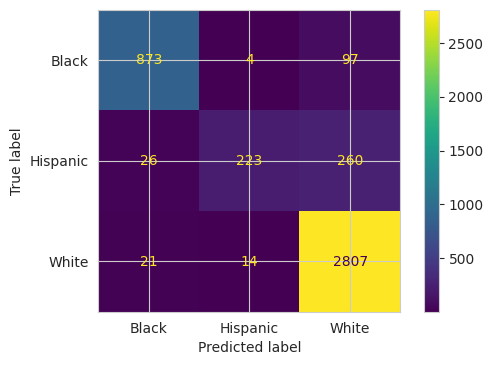

In [ ]:
y_pred = xgb_model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(xgb_model,X_train,y_train);

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50727187, 0.50727187, 0.50727187, ..., 0.50727187, 0.50727187,
       2.83235102])

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.480151     974
Hispanic  2.832351     509
White     0.507272    2842
Name: 0, dtype: int64

In [ ]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

### XGBoost Model GridsearchCV

In [ ]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 1}

[[274   5  45]
 [  9  71  90]
 [  9  11 928]]
              precision    recall  f1-score   support

       Black       0.94      0.85      0.89       324
    Hispanic       0.82      0.42      0.55       170
       White       0.87      0.98      0.92       948

    accuracy                           0.88      1442
   macro avg       0.88      0.75      0.79      1442
weighted avg       0.88      0.88      0.87      1442



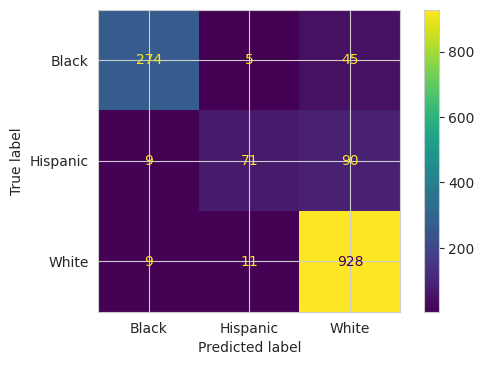

In [ ]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

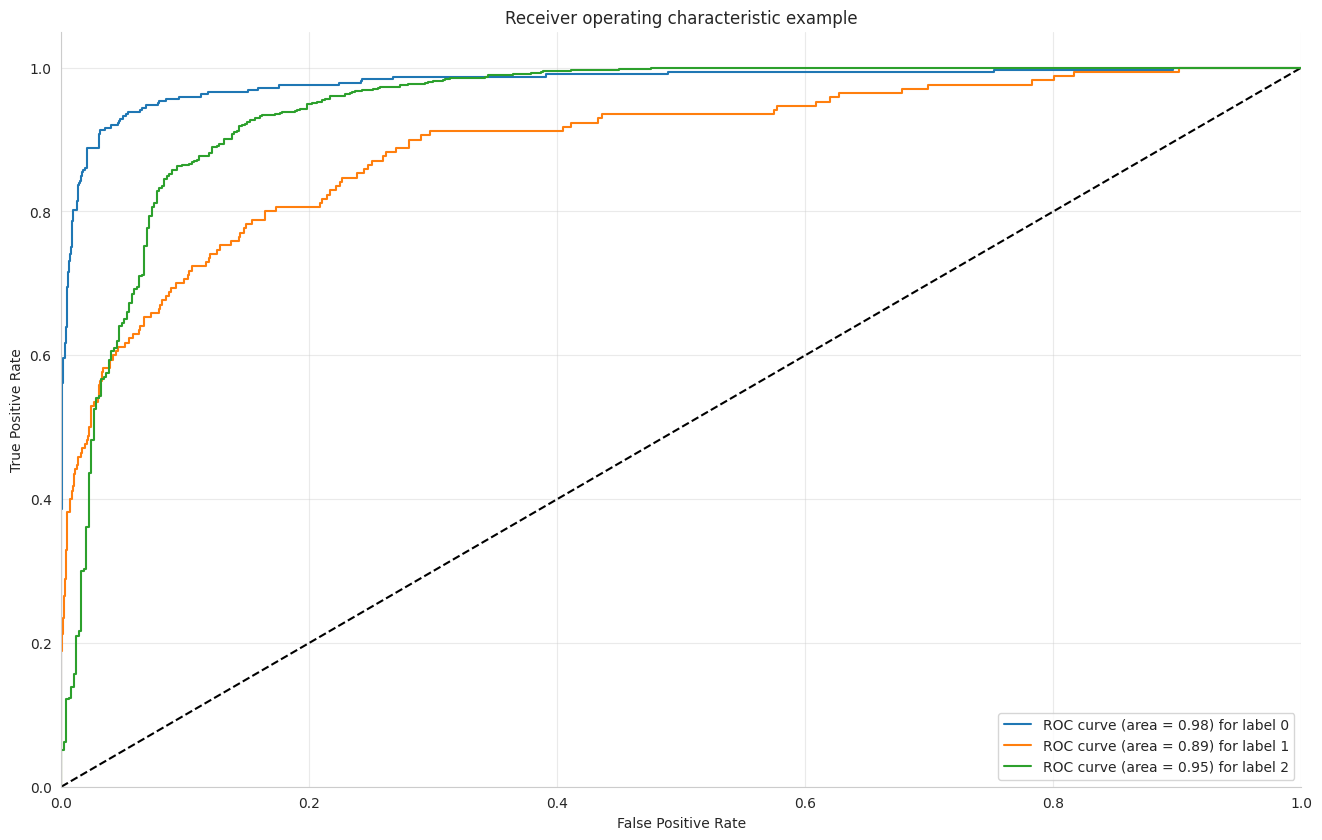

In [ ]:
plot_multiclass_roc_for_tree(xgb_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10));

# Lets Make a Prediction with the Final Model


In [ ]:
X.describe().loc["mean"]


abdominalextensiondepthsitting      247.265823
acromialheight                     1408.641235
acromionradialelength               328.068320
anklecircumference                  225.204786
axillaheight                       1301.912953
                                      ...     
SubjectsBirthLocation_Wisconsin       0.016993
SubjectsBirthLocation_Wyoming         0.001214
SubjectsBirthLocation_Zambia          0.000173
WritingPreference_Left hand           0.107855
WritingPreference_Right hand          0.881914
Name: mean, Length: 235, dtype: float64

In [ ]:
aa = pd.DataFrame(X.iloc[205]).T
aa

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthLocation_South Africa,SubjectsBirthLocation_South America,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,SubjectsBirthLocation_South Korea,SubjectsBirthLocation_Sri Lanka,SubjectsBirthLocation_Sudan,SubjectsBirthLocation_Syria,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Togo,SubjectsBirthLocation_Trinidad and Tobago,SubjectsBirthLocation_Turkey,SubjectsBirthLocation_US Virgin Islands,SubjectsBirthLocation_Ukraine,SubjectsBirthLocation_United Kingdom,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
205,186,1267,300,197,1178,221,181,383,277,229,430,65,295,264,120,770,192,861,539,445,306,1351,258,810,184,1133,779,491,294,30,58,18,178,688,90,243,310,246,476,428,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
aa = pd.get_dummies(aa)

In [ ]:
aa = scaler.transform(aa)
X_scaled = scaler.fit_transform(X)

In [ ]:
final_model = SVC(C=400,class_weight=None,decision_function_shape="ovr", gamma="auto",kernel="rbf" ).fit(X_scaled,y)

In [ ]:
y[205]

'Black'

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

What is SMOTE?


   SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.


   The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.


   SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1% of the cases have the target value A (the minority class), and 99% of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the module's properties.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1250})
under = RandomUnderSampler(sampling_strategy={"White":2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
from imblearn.combine import SMOTEENN,SMOTETomek
ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled, y_resampled = ros1.fit_resample(X_train, y_train)

In [ ]:
X_resampled, y_resampled = ros2.fit_resample(X_resampled, y_resampled)

In [ ]:
y_resampled.value_counts()

Hispanic    2774
Black       2507
White       1182
Name: DODRace, dtype: int64

In [ ]:
y_train.value_counts()

White       2842
Black        974
Hispanic     509
Name: DODRace, dtype: int64

## Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

Oversampling and undersampling in data analysis

Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques.

In [ ]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

f1_Hispanic =  make_scorer(f1_score, average=None, labels = ["Hispanic"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighed, refit=True,n_jobs=-1)

svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [ ]:
svm_model_grid.best_params_

{'C': 50.0,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovr',
 'gamma': 1,
 'kernel': 'rbf'}

[[257  16  51]
 [ 16 113  41]
 [111 153 684]]
              precision    recall  f1-score   support

       Black       0.67      0.79      0.73       324
    Hispanic       0.40      0.66      0.50       170
       White       0.88      0.72      0.79       948

    accuracy                           0.73      1442
   macro avg       0.65      0.73      0.67      1442
weighted avg       0.78      0.73      0.74      1442



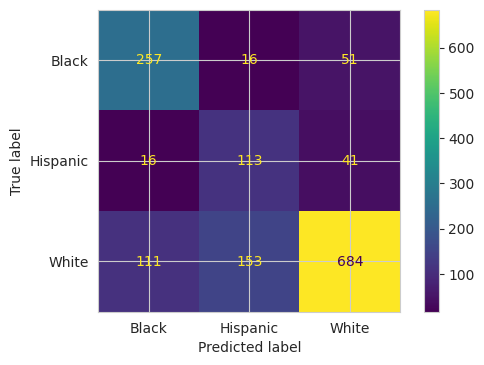

In [ ]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

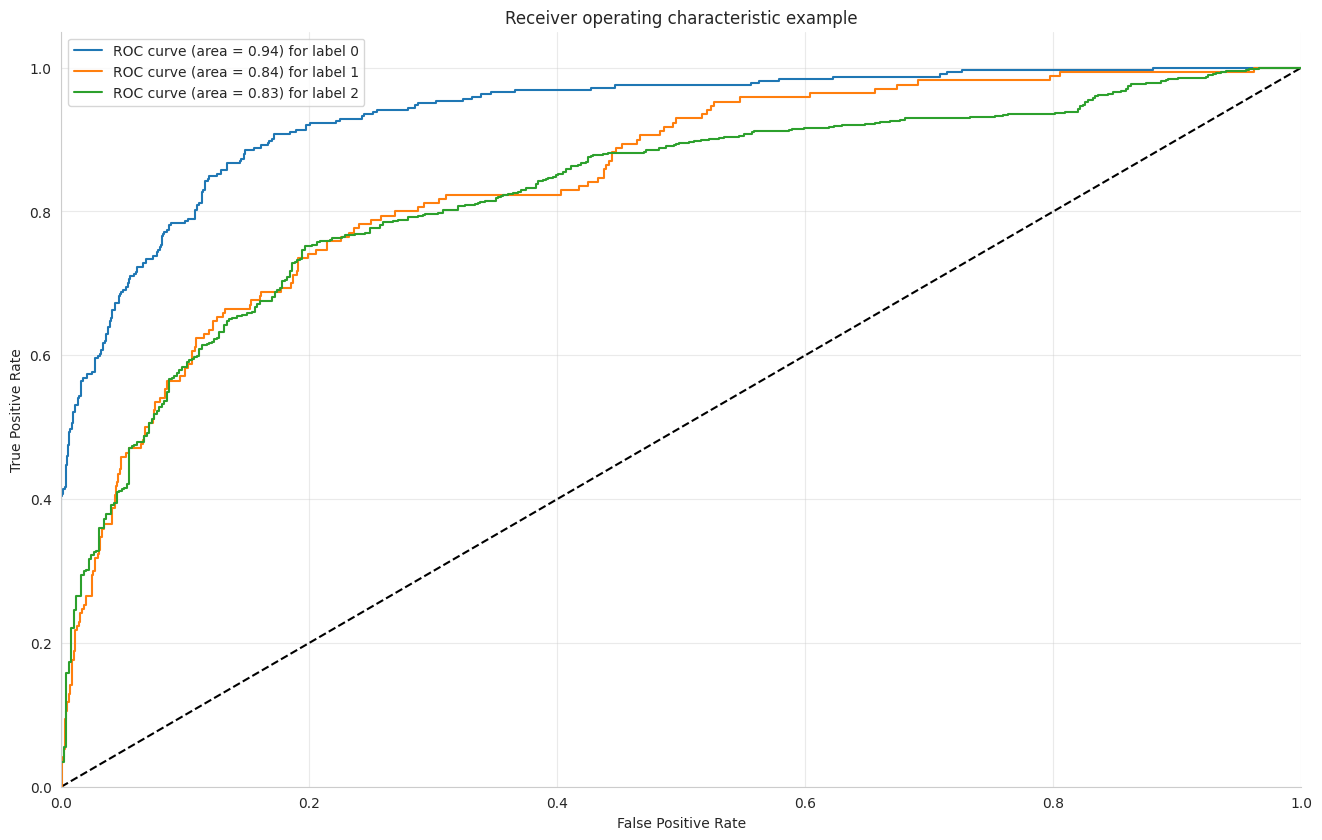

In [ ]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

## Xgboost Over/ Under Sampling

In [ ]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.5}

[[292  16  16]
 [ 14 123  33]
 [ 35 145 768]]
              precision    recall  f1-score   support

       Black       0.86      0.90      0.88       324
    Hispanic       0.43      0.72      0.54       170
       White       0.94      0.81      0.87       948

    accuracy                           0.82      1442
   macro avg       0.74      0.81      0.76      1442
weighted avg       0.86      0.82      0.83      1442



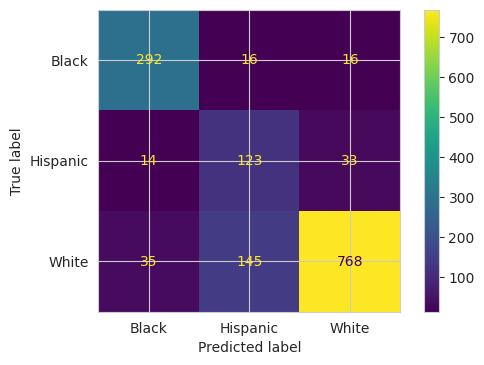

In [ ]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

matthews_corrcoef
What is matthews_corrcoef?

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.6850976544930764

cohen_kappa_score
What is cohen_kappa_score?

This function computes Cohen's kappa [1], a score that expresses the level of agreement between two annotators on a classification problem. It is defined as. κ = ( p o − p e ) / ( 1 − p e ).

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6741268528310316

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ModuleNotFoundError: ignored

In [ ]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

In [ ]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [ ]:
shap_values

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [ ]:
explainer.expected_value[1]

In [ ]:
X_test_scaled[203]

In [ ]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [ ]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

## Shap values for all data

In [ ]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

In [ ]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [ ]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [ ]:
#list(X.columns)

In [ ]:
X3 = data[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

In [ ]:
X3.shape

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [ ]:
pipe_shap_model.fit(X_train3, y_train3)

In [ ]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

## SMOTE for X3 dataset

In [ ]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)


In [ ]:
smote_pipeline_2.fit(X_train3, y_train3)


In [ ]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)


In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Find the best threshold for multiclassification

In [ ]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})


In [ ]:
y2

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)


In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)


In [ ]:
pipe_shap_model2.fit(X_train4, y_train4)


In [ ]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)


In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [ ]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.7054275890950658

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

<IPython.core.display.Javascript object>

In [ ]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

In [ ]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___